<a href="https://colab.research.google.com/github/edgi-govdata-archiving/EEW-SOEP/blob/main/SOE_EnforcementCompliance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enforcement/Compliance

* Extend enforcement/compliance notebooks ([here](https://colab.research.google.com/github/edgi-govdata-archiving/ECHO-National/blob/main/Nationwide_Trends_Over_Time.ipynb#scrollTo=lJRsVdQxQje7) and [here](https://colab.research.google.com/github/edgi-govdata-archiving/ECHO-Cross-Program/blob/main/ECHO_National.ipynb)  to assess CWA, CAA, RCA, SDWA violations 2016-2023 - how many and how severe (break down by violation type)?
* Extend enforcement/compliance notebooks to assess CWA, CAA, RCA, SDWA enforcement actions (enforcements/violations)
* Extend enforcement/compliance notebooks to assess CWA, CAA, RCA, SDWA inspection rates (per 1000 facilities). Compare inspection frequency to guidelines (e.g. 5 years for CAA?)



In [ ]:
!pip install ECHO_modules &>/dev/null;
from ECHO_modules.get_data import get_echo_data
import pandas

## CWA, CAA, RCA, SDWA violations 2016-2023 - how many and how severe (break down by violation type)?

### Get data

In [ ]:
sql = 'select * from "ICIS-AIR_VIOLATION_HISTORY" where "EARLIEST_FRV_DETERM_DATE" ' +\
'like \'__-__-20__\' or "HPV_DAYZERO_DATE" like \'__-__-20__\'' # Anything from the 21st century

air_violations = get_echo_data( sql) # Set ID as index
air_violations

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,DSCV_PATHWAY_DATE,NFTC_PATHWAY_DATE
0,AR0000000513900037,3400362735,State,AR,NaN,AR000A0000051390003700134,HPV,CAANSPS CAASIP CAATVP,New Source Performance Standards State Impleme...,300000243,VOLATILE ORGANIC COMPOUNDS (VOCS),NaN,05-18-2000,12-13-2002,08-10-2000,NaN
1,AR0000000513900037,3400362739,State,AR,NaN,AR000A0000051390003700161,HPV,CAASIP CAATVP,State Implementation Plan for National Primary...,NaN,NaN,NaN,10-24-2001,06-19-2002,NaN,09-24-2001
2,AR0000000513900037,3400362741,State,AR,NaN,AR000A0000051390003700216,HPV,CAANSPS CAASIP CAATVP,New Source Performance Standards State Impleme...,NaN,NaN,NaN,09-04-2004,08-11-2009,NaN,08-04-2004
3,AR0000000513900037,3400362743,State,AR,NaN,AR000A0000051390003700223,FRV,CAANSPS CAASIP CAATVP,New Source Performance Standards State Impleme...,300000097,Toluene,08-30-2007,NaN,02-01-2008,NaN,07-30-2007
4,AR0000000513900037,3400362746,State,AR,NaN,AR000A0000051390003700231,FRV,CAANSPS CAASIP,New Source Performance Standards State Impleme...,NaN,NaN,04-11-2008,NaN,03-23-2009,NaN,03-11-2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75694,OK0000004008300206,3604218498,State,OK,NaN,OK000A4008300206EC0013285,FRV,CAANSPS CAATVP,New Source Performance Standards Title V Permits,300000329,FACIL,12-12-2024,NaN,NaN,NaN,NaN
75695,PA000840127,3604224257,State,PA,NaN,PA000A0000F00000003239814,FRV,CAASIP,State Implementation Plan for National Primary...,300000329,FACIL,08-12-2021,NaN,NaN,NaN,NaN
75696,PA000840089,3604231396,State,PA,NaN,PA000A0000F00000003562088,FRV,CAASIP,State Implementation Plan for National Primary...,300000329,FACIL,05-31-2023,NaN,NaN,NaN,NaN
75697,PA000840089,3604231401,State,PA,NaN,PA000A0000F00000003624094,FRV,CAASIP,State Implementation Plan for National Primary...,300000329,FACIL,10-03-2023,NaN,NaN,NaN,NaN


In [ ]:
# 2001 or later
air_violations["EARLIEST_FRV_DETERM_DATE"]  = pandas.to_datetime(air_violations["EARLIEST_FRV_DETERM_DATE"], format='%m-%d-%Y', errors='coerce')
air_violations["HPV_DAYZERO_DATE"]  = pandas.to_datetime(air_violations["HPV_DAYZERO_DATE"], format='%m-%d-%Y', errors='coerce')
air_violations = air_violations[(air_violations["EARLIEST_FRV_DETERM_DATE"] > '2001') | (air_violations["HPV_DAYZERO_DATE"] > '2001')]
air_violations["DATE"] = air_violations['EARLIEST_FRV_DETERM_DATE'].fillna(air_violations['HPV_DAYZERO_DATE'] )
air_violations

<ipython-input-3-b71a5086d6ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_violations["DATE"] = air_violations['EARLIEST_FRV_DETERM_DATE'].fillna(air_violations['HPV_DAYZERO_DATE'] )


,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,DSCV_PATHWAY_DATE,NFTC_PATHWAY_DATE,DATE
1,AR0000000513900037,3400362739,State,AR,NaN,AR000A0000051390003700161,HPV,CAASIP CAATVP,State Implementation Plan for National Primary...,NaN,NaN,NaT,2001-10-24,06-19-2002,NaN,09-24-2001,2001-10-24
2,AR0000000513900037,3400362741,State,AR,NaN,AR000A0000051390003700216,HPV,CAANSPS CAASIP CAATVP,New Source Performance Standards State Impleme...,NaN,NaN,NaT,2004-09-04,08-11-2009,NaN,08-04-2004,2004-09-04
3,AR0000000513900037,3400362743,State,AR,NaN,AR000A0000051390003700223,FRV,CAANSPS CAASIP CAATVP,New Source Performance Standards State Impleme...,300000097,Toluene,2007-08-30,NaT,02-01-2008,NaN,07-30-2007,2007-08-30
4,AR0000000513900037,3400362746,State,AR,NaN,AR000A0000051390003700231,FRV,CAANSPS CAASIP,New Source Performance Standards State Impleme...,NaN,NaN,2008-04-11,NaT,03-23-2009,NaN,03-11-2008,2008-04-11
5,AR0000000513900037,3400362751,State,AR,NaN,AR000A0000051390003700273,FRV,CAASIP CAATVP,State Implementation Plan for National Primary...,NaN,NaN,2012-02-28,NaT,07-24-2012,12-15-2011,01-18-2012,2012-02-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75694,OK0000004008300206,3604218498,State,OK,NaN,OK000A4008300206EC0013285,FRV,CAANSPS CAATVP,New Source Performance Standards Title V Permits,300000329,FACIL,2024-12-12,NaT,NaN,NaN,NaN,2024-12-12
75695,PA000840127,3604224257,State,PA,NaN,PA000A0000F00000003239814,FRV,CAASIP,State Implementation Plan for National Primary...,300000329,FACIL,2021-08-12,NaT,NaN,NaN,NaN,2021-08-12
75696,PA000840089,3604231396,State,PA,NaN,PA000A0000F00000003562088,FRV,CAASIP,State Implementation Plan for National Primary...,300000329,FACIL,2023-05-31,NaT,NaN,NaN,NaN,2023-05-31
75697,PA000840089,3604231401,State,PA,NaN,PA000A0000F00000003624094,FRV,CAASIP,State Implementation Plan for National Primary...,300000329,FACIL,2023-10-03,NaT,NaN,NaN,NaN,2023-10-03


In [ ]:
sql = 'select * from "NPDES_QNCR_HISTORY" where "YEARQTR" > 20010' # 2001 or later
water_violations = get_echo_data( sql)
water_violations

,NPDES_ID,YEARQTR,HLRNC,NUME90Q,NUMCVDT,NUMSVCD,NUMPSCH,NUMD8090Q
0,AK0000167,20112,,0,0,0,0,0
1,AK0000167,20113,,0,0,0,0,0
2,AK0000167,20114,,0,0,0,0,0
3,AK0000167,20121,,0,0,0,0,0
4,AK0000167,20122,,0,0,0,0,0
...,...,...,...,...,...,...,...,...
6969832,WYR320834,20194,,0,0,0,0,0
6969833,WYR320834,20201,,0,0,0,0,0
6969834,WYR320834,20202,,0,0,0,0,0
6969835,WYR320835,20172,U,0,0,0,0,0


In [ ]:
sql = 'select * from "RCRA_VIOLATIONS" where "DATE_VIOLATION_DETERMINED" like \'__/__/20__\'' # 21st century
waste_violations = get_echo_data( sql)
waste_violations

,ID_NUMBER,ACTIVITY_LOCATION,VIOLATION_TYPE,VIOLATION_TYPE_DESC,VIOL_DETERMINED_BY_AGENCY,DATE_VIOLATION_DETERMINED,ACTUAL_RTC_DATE,SCHEDULED_COMPLIANCE_DATE
0,KSD031422306,KS,262.A,Standards Applicable to Generators of HW: General,S,04/18/2000,01/30/2001,12/01/2000
1,MOP000002105,MO,262.C,Standards Applicable to Generators of HW: Pre-...,S,10/27/2015,10/27/2015,NaN
2,MOR000553040,MO,273.B,Standards for Universal Waste Management: Stan...,S,12/22/2015,02/11/2016,NaN
3,ALD000826958,AL,262.C,Standards Applicable to Generators of HW: Pre-...,S,09/19/2000,12/11/2000,NaN
4,INR000004143,IN,262.C,Standards Applicable to Generators of HW: Pre-...,S,09/19/2000,12/03/2001,NaN
...,...,...,...,...,...,...,...,...
427512,MAC300012762,MA,262.A,Standards Applicable to Generators of HW: General,E,02/15/2022,12/08/2022,NaN
427513,ILR000207985,IL,262.D,Standards Applicable to Recordkeeping and Repo...,S,06/22/2022,01/06/2023,NaN
427514,VAR000517706,VA,262.A,Standards Applicable to Generators of HW: General,E,02/15/2022,12/08/2022,NaN
427515,CAL000308715,CA,262.C,Standards Applicable to Generators of HW: Pre-...,E,02/15/2022,12/08/2022,NaN


In [ ]:
# 2001 or later
waste_violations["DATE_VIOLATION_DETERMINED"] = pandas.to_datetime(waste_violations["DATE_VIOLATION_DETERMINED"], format='%m/%d/%Y', errors='coerce')
waste_violations = waste_violations[(waste_violations["DATE_VIOLATION_DETERMINED"] > '2001')]
waste_violations

,ID_NUMBER,ACTIVITY_LOCATION,VIOLATION_TYPE,VIOLATION_TYPE_DESC,VIOL_DETERMINED_BY_AGENCY,DATE_VIOLATION_DETERMINED,ACTUAL_RTC_DATE,SCHEDULED_COMPLIANCE_DATE
1,MOP000002105,MO,262.C,Standards Applicable to Generators of HW: Pre-...,S,2015-10-27,10/27/2015,NaN
2,MOR000553040,MO,273.B,Standards for Universal Waste Management: Stan...,S,2015-12-22,02/11/2016,NaN
10,MIR000021394,MI,262.C,Standards Applicable to Generators of HW: Pre-...,S,2004-01-21,04/05/2004,03/01/2004
13,ORQ000017434,OR,262.A,Standards Applicable to Generators of HW: General,S,2001-03-20,07/26/2001,04/10/2001
14,MID005356621,MI,262.C,Standards Applicable to Generators of HW: Pre-...,S,2001-03-29,05/02/2001,04/30/2001
...,...,...,...,...,...,...,...,...
427512,MAC300012762,MA,262.A,Standards Applicable to Generators of HW: General,E,2022-02-15,12/08/2022,NaN
427513,ILR000207985,IL,262.D,Standards Applicable to Recordkeeping and Repo...,S,2022-06-22,01/06/2023,NaN
427514,VAR000517706,VA,262.A,Standards Applicable to Generators of HW: General,E,2022-02-15,12/08/2022,NaN
427515,CAL000308715,CA,262.C,Standards Applicable to Generators of HW: Pre-...,E,2022-02-15,12/08/2022,NaN


### Analysis of violations

In [ ]:
air_peryear = air_violations.set_index("DATE").resample('YE').count()[["PGM_SYS_ID"]] # Count of violations each year
air_unique_peryear = air_violations.set_index("DATE").resample('YE').nunique()[["PGM_SYS_ID"]] # Unique facilities each year
air_violations_intensity = air_peryear/air_unique_peryear # Total violations / number of different facilities in violation. Gives sense of targeting/bad actors
air_peryear

,PGM_SYS_ID
DATE,
2000-12-31,1
2001-12-31,1932
2002-12-31,2173
2003-12-31,2254
2004-12-31,2293
2005-12-31,1975
2006-12-31,2152
2007-12-31,2411
2008-12-31,2679


In [ ]:
# Types of violations
air_violations["YEAR"] = air_violations["DATE"].dt.year
air_violations["YEAR"]
air_violations.groupby(by=["YEAR","PROGRAM_DESCS"]).count()[["PGM_SYS_ID"]].sort_values(by="PGM_SYS_ID", ascending=False).head(50)

<ipython-input-13-6a28b87fdf4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_violations["YEAR"] = air_violations["DATE"].dt.year


PGM_SYS_ID
YEAR PROGRAM_DESCS                                                 
2021 State Implementation Plan for National Primary ...        2036
2023 Title V Permits                                           1792
     State Implementation Plan for National Primary ...        1779
2022 State Implementation Plan for National Primary ...        1754
2019 State Implementation Plan for National Primary ...        1661
2022 Title V Permits                                           1636
2018 State Implementation Plan for National Primary ...        1598
2021 Title V Permits                                           1525
2017 State Implementation Plan for National Primary ...        1475
2019 Title V Permits                                           1448
2024 State Implementation Plan for National Primary ...        1443
2020 State Implementation Plan for National Primary ...        1342
2016 Title V Permits                                           1319
2018 Title V Permits                                           1318
2016 State Implementation Plan for National Primary ...        1310
2024 Title V Permits                                           1294
2015 State Implementation Plan for National Primary ...        1228
2020 Title V Permits                                           1179
2015 Title V Permits                                           1174
2017 Title V Permits                                           1125
2008 Title V Permits                                            969
2007 Title V Permits                                            925
2009 Title V Permits                                            912
     State Implementation Plan for National Primary ...         911
2014 State Implementation Plan for National Primary ...         830
2002 Title V Permits                                            808
2010 State Implementation Plan for National Primary ...         795
     Title V Permits                                            787
2003 Title V Permits                                            779
2011 Title V Permits                                            771
2002 State Implementation Plan for National Primary ...         758
2001 State Implementation Plan for National Primary ...         745
2011 State Implementation Plan for National Primary ...         745
2008 State Implementation Plan for National Primary ...         738
2006 Title V Permits                                            723
2012 Title V Permits                                            698
2014 Title V Permits                                            675
2004 Title V Permits                                            659
2001 Title V Permits                                            611
2007 State Implementation Plan for National Primary ...         606
2013 Title V Permits                                            579
     State Implementation Plan for National Primary ...         575
2003 State Implementation Plan for National Primary ...         574
2004 State Implementation Plan for National Primary ...         562
2005 State Implementation Plan for National Primary ...         551
2012 State Implementation Plan for National Primary ...         542
2006 State Implementation Plan for National Primary ...         518
2005 Title V Permits                                            493
2004 State Implementation Plan for National Primary ...         436
2005 State Implementation Plan for National Primary ...         381

In [ ]:
# Water violations
#water_violations["YEAR"] = water_violations["YEARQTR"].astype(str).str.slice(0,4)
#water_peryear = water_violations.groupby(by="YEAR")[["NUME90Q",	"NUMCVDT",	"NUMSVCD",	"NUMPSCH",	"NUMD8090Q"]].sum()# Count of violations each year
#water_unique_peryear = water_violations.groupby(by="YEAR").nunique()[["NPDES_ID"]] # Unique facilities each year
#water_violations_intensity = water_peryear/water_unique_peryear # Total violations / number of different facilities in violation. Gives sense of targeting/bad actors
#water_peryear['NUME90Q'].plot()
water_peryear["NUME90Q"]/water_unique_peryear["NPDES_ID"]
# What about addition of new chemicals for reporting/permitting?

,0
YEAR,
2001,2.346582
2002,2.564638
2003,2.824126
2004,2.886201
2005,2.046123
2006,2.015487
2007,2.152229
2008,2.119804
2009,2.046067


In [ ]:
## Analysis of violations
waste_peryear = waste_violations.set_index("DATE_VIOLATION_DETERMINED").resample('YE').count()[["ID_NUMBER"]] # Count of violations each year
waste_unique_peryear = waste_violations.set_index("DATE_VIOLATION_DETERMINED").resample('YE').nunique()[["ID_NUMBER"]] # Unique facilities each year
waste_violations_intensity = waste_peryear/waste_unique_peryear # Total violations / number of different facilities in violation. Gives sense of targeting/bad actors
waste_violations_intensity

,ID_NUMBER
DATE_VIOLATION_DETERMINED,
2001-12-31,2.201501
2002-12-31,2.136752
2003-12-31,2.177133
2004-12-31,2.258907
2005-12-31,2.276214
2006-12-31,2.563143
2007-12-31,2.731145
2008-12-31,2.797941
2009-12-31,2.714321


## Inspections

In [ ]:
sql = 'select * from \"ICIS-AIR_FCES_PCES\" where \"ACTUAL_END_DATE\" like \'__-__-20__\''

# Download the data from that URL
air_inspections = get_echo_data( sql )

# 2001 or later
air_inspections["ACTUAL_END_DATE"]  = pandas.to_datetime(air_inspections["ACTUAL_END_DATE"], format='%m-%d-%Y', errors='coerce')
air_inspections = air_inspections[(air_inspections["ACTUAL_END_DATE"] > '2001') ]
air_inspections

/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


,PGM_SYS_ID,ACTIVITY_ID,STATE_EPA_FLAG,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,COMP_MONITOR_TYPE_CODE,COMP_MONITOR_TYPE_DESC,ACTUAL_END_DATE,PROGRAM_CODES,ACTIVITY_PURPOSE_DESC
0,PR0000007212300011,121929,E,INS,Inspection/Evaluation,PCE,PCE On-Site,2004-05-04,NaN,Agency Priority
1,080000004904700004,98071,E,INS,Inspection/Evaluation,FOO,FCE On-Site,2003-09-24,NaN,Core Program
2,080000005601300005,84777,E,INS,Inspection/Evaluation,FOO,FCE On-Site,2002-04-02,NaN,Core Program
3,PR0000007212300011,107497,E,INS,Inspection/Evaluation,PCE,PCE On-Site,2002-10-18,NaN,Agency Priority
4,080000004904700004,157483,E,INS,Inspection/Evaluation,FOO,FCE On-Site,2005-09-14,NaN,Core Program
...,...,...,...,...,...,...,...,...,...,...
1464960,CT0000000900302470,3601540675,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2018-08-22,"CAAFESOP, CAASIP",NaN
1464961,NC0000003707500010,3603476442,S,INS,Inspection/Evaluation,PFF,PCE Off-Site,2023-01-06,CAASIP,NaN
1464962,KS0000002020900040,3602393798,S,INS,Inspection/Evaluation,FOO,FCE On-Site,2020-12-17,"CAANSPS, CAASIP",NaN
1464963,PA000549239,3603369712,S,INS,Inspection/Evaluation,PFF,PCE Off-Site,2022-09-28,"CAAMACT, CAANSPS, CAASIP, CAATVP",NaN


In [ ]:
sql = 'select "NPDES_ID", "REGISTRY_ID", "ACTUAL_END_DATE", "STATE_EPA_FLAG"' + \
        ' from "NPDES_INSPECTIONS" where "ACTUAL_END_DATE" like \'__/__/20__\''

water_inspections = get_echo_data( sql )

# 2001 or later
water_inspections["ACTUAL_END_DATE"]  = pandas.to_datetime(water_inspections["ACTUAL_END_DATE"], format='%m/%d/%Y', errors='coerce')
water_inspections = water_inspections[(water_inspections["ACTUAL_END_DATE"] > '2001') ]
water_inspections

/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


,NPDES_ID,REGISTRY_ID,ACTUAL_END_DATE,STATE_EPA_FLAG
0,NY0030864,110010637668,2003-11-18,E
1,PR0022772,110009815049,2003-11-17,E
2,PR0022721,110013721543,2003-11-17,E
3,WA0025666,110013724942,2002-12-02,E
4,WA0000825,110000491502,2002-08-26,E
...,...,...,...,...
1130050,HIU010790,HIU010790,2024-12-20,S
1130051,TX0126608,110034543652,2025-01-06,S
1130052,FLG110276,110006658599,2024-10-28,S
1130053,ALR10C4E2,110071512103,2024-12-11,S


In [ ]:
sql = 'select * from "RCRA_EVALUATIONS" where "EVALUATION_START_DATE" like \'__/__/20__\''

waste_inspections = get_echo_data( sql )

# 2001 or later
waste_inspections["EVALUATION_START_DATE"]  = pandas.to_datetime(waste_inspections["EVALUATION_START_DATE"], format='%m/%d/%Y', errors='coerce')
waste_inspections = waste_inspections[(waste_inspections["EVALUATION_START_DATE"] > '2001') ]
waste_inspections

,ID_NUMBER,ACTIVITY_LOCATION,EVALUATION_IDENTIFIER,EVALUATION_TYPE,EVALUATION_DESC,EVALUATION_AGENCY,EVALUATION_START_DATE,FOUND_VIOLATION
0,MN0000232793,MN,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2003-10-15,Y
1,MN0000239541,MN,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2005-06-29,N
2,MN0000239814,MN,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2006-04-04,N
3,MN0000242891,MN,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2003-12-30,N
4,MN0000243048,MN,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2004-11-01,Y
...,...,...,...,...,...,...,...,...
702374,NCD041463761,NC,72A,CEI,COMPLIANCE EVALUATION INSPECTION,S,2022-08-19,N
702375,MAR000015867,MA,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2022-08-25,N
702376,CAR000236588,CA,001,CEI,COMPLIANCE EVALUATION INSPECTION,E,2022-09-30,Y
702377,VAD065377673,VA,001,CEI,COMPLIANCE EVALUATION INSPECTION,S,2022-09-08,N


<Axes: xlabel='ACTUAL_END_DATE'>

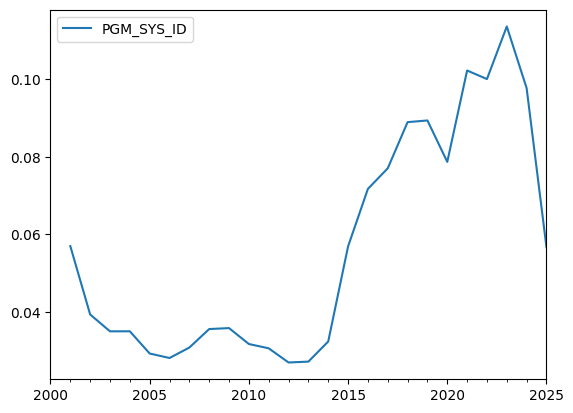

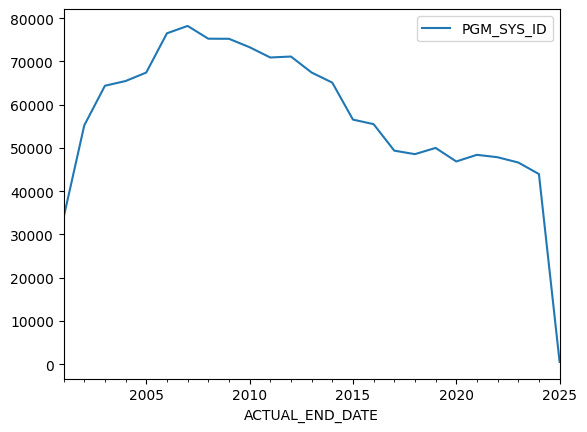

In [ ]:
# Analyze inspections on their own, then in relation to violations
ai_peryear = air_inspections.set_index("ACTUAL_END_DATE").resample('YE').count()[["PGM_SYS_ID"]] # Count of inspections
ai_unique_peryear = air_inspections.set_index("ACTUAL_END_DATE").resample('YE').nunique()[["PGM_SYS_ID"]] # Number of different facilities inspected
ai_peryear/ai_unique_peryear # Intensity of inspections
(air_peryear / ai_peryear).plot() # Violations per inspection
ai_peryear.plot()

In [ ]:
ai_peryear/ai_unique_peryear

,PGM_SYS_ID
ACTUAL_END_DATE,
2001-12-31,1.520818
2002-12-31,1.782233
2003-12-31,1.861170
2004-12-31,1.924058
2005-12-31,1.980905
2006-12-31,2.119556
2007-12-31,2.197538
2008-12-31,2.162194
2009-12-31,2.027325


In [ ]:
# Analyze inspection re-occurence frequency
import numpy as np
## Summarize number of inspections for each facility. Calculate range between them. Divide.
count = air_inspections.groupby(by="PGM_SYS_ID")[["ACTUAL_END_DATE"]].nunique() # Different dates inspected
range = air_inspections.groupby(by='PGM_SYS_ID')[["ACTUAL_END_DATE"]].apply(lambda f: (f["ACTUAL_END_DATE"].dt.date.max() - f["ACTUAL_END_DATE"].dt.date.min()).days)
freq = count.merge(range.to_frame(), left_index=True, right_index=True).sort_values(by=0, ascending=False)
freq = freq[freq[0]>0] # Note that we are not looking at facilities only inspected once or >1 but on same day...(inf return frequency)
freq = freq[freq["ACTUAL_END_DATE"]>1]
freq["interval"] = freq[0]/(freq["ACTUAL_END_DATE"]-1) # Average days between inspections
freq.sort_values(by="interval", ascending=False).head(50)

,ACTUAL_END_DATE,0,interval
PGM_SYS_ID,,,
GA0000001331100006,2,8609,8609.0
CO0000000808100100,2,8448,8448.0
LA0000002200300002,2,8386,8386.0
LA0000002212500009,2,8372,8372.0
KS0000002012300015,2,8270,8270.0
NJ0000003403940346,2,8267,8267.0
NM0000003502500140,2,8226,8226.0
0900000006037R9845,2,8207,8207.0
CO0000000800501206,2,8136,8136.0


In [ ]:
len(list(air_inspections['PGM_SYS_ID'].unique()))

137450

In [ ]:
freq[freq["interval"]>1825]

,ACTUAL_END_DATE,0,interval
PGM_SYS_ID,,,
CO0000000804100054,5,8709,2177.25
IN0000001816300059,3,8690,4345.00
CO0000000801400619,5,8646,2161.50
CO0000000800500650,4,8646,2882.00
NJ0000003402725142,3,8646,4323.00
...,...,...,...
ME0000002303100475,2,1826,1826.00
ID0000001605500041,2,1826,1826.00
MS0000002812900029,2,1826,1826.00


In [ ]:
df = freq.sort_values(by="interval", ascending=False).head(50)
list(df.index)

['PA000639581',
 'CO0000000808100100',
 'LA0000002212500009',
 'KS0000002012300015',
 'NJ0000003403940346',
 'NM0000003502500140',
 '0900000006037R9845',
 'CO0000000800501206',
 'NM0000003501300004',
 'OH0000001652050101',
 'NJ0000003402500103',
 'MN0000002712300060',
 'IL000099030ABF',
 'KS0000002012900091',
 'OR0000004106702681',
 'MN0000002712300636',
 'MN0000002703700188',
 'MI00000000000N0765',
 'IL000031600CEH',
 'LA0000002211500113',
 'KS0000002017300268',
 'MA0000002512000319',
 'LA0000002210100229',
 'TX0000004805300008',
 'MA0000002511901672',
 'CO0000000803101811',
 'CO0000000812300380',
 'MI00000000000N2907',
 'MN0000002705300042',
 'PA000639480',
 'MN0000002705300089',
 'LA0000002207500165',
 'IA0000001915700005',
 'KS0000002077700604',
 'LA0000002210900195',
 'LA0000002205100168',
 'IL000039005ABH',
 'NY0000007312600030',
 'NM0000003504500397',
 'CO0000000804100023',
 'MA0000002511902451',
 'PA000571673',
 'NM0000003501500350',
 'TX0000004836100049',
 'KS0000002014300006'

In [ ]:
air_violations[air_violations["PGM_SYS_ID"].isin(list(df.index))]

,PGM_SYS_ID,ACTIVITY_ID,AGENCY_TYPE_DESC,STATE_CODE,AIR_LCON_CODE,COMP_DETERMINATION_UID,ENF_RESPONSE_POLICY_CODE,PROGRAM_CODES,PROGRAM_DESCS,POLLUTANT_CODES,POLLUTANT_DESCS,EARLIEST_FRV_DETERM_DATE,HPV_DAYZERO_DATE,HPV_RESOLVED_DATE,DSCV_PATHWAY_DATE,NFTC_PATHWAY_DATE,DATE,YEAR
14882,0900000006037R9845,3400419988,U.S. EPA,NaN,NaN,09000F000006037R984500004,HPV,CAAMACT,MACT Standards (40 CFR Part 63),300000242,TOTAL HAZARDOUS AIR POLLUTANTS (HAPS),NaT,2009-09-28,08-25-2014,NaN,NaN,2009-09-28,2009


<Axes: xlabel='EVALUATION_START_DATE'>

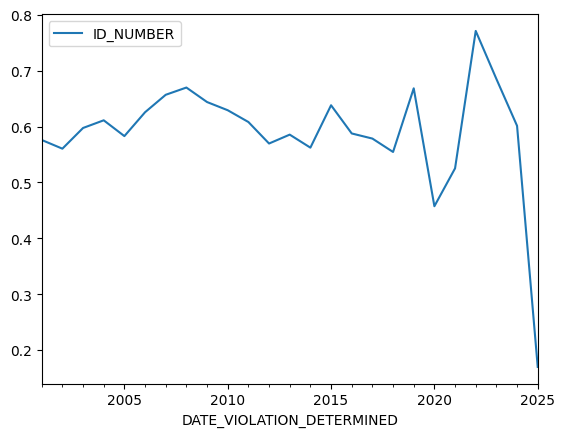

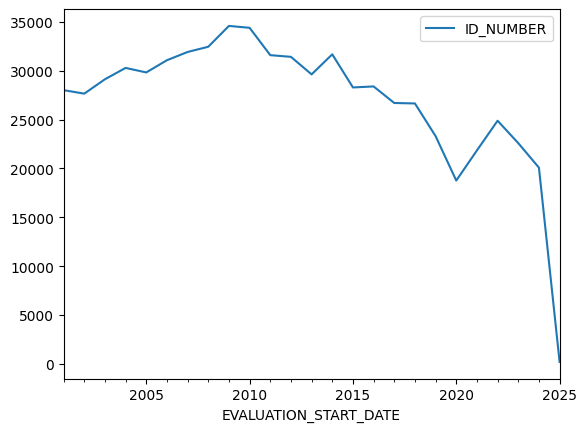

In [ ]:
# Analyze inspections on their own, then in relation to violations
w_peryear = waste_inspections.set_index("EVALUATION_START_DATE").resample('YE').count()[["ID_NUMBER"]] # Count of inspections
w_unique_peryear = waste_inspections.set_index("EVALUATION_START_DATE").resample('YE').nunique()[["ID_NUMBER"]] # Number of different facilities inspected
w_peryear/w_unique_peryear # Intensity of inspections
(waste_peryear / w_peryear).plot() # Violations per inspection
w_peryear.plot()

<Axes: xlabel='ACTUAL_END_DATE'>

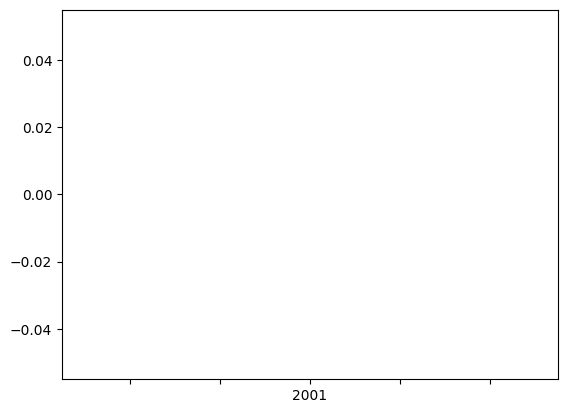

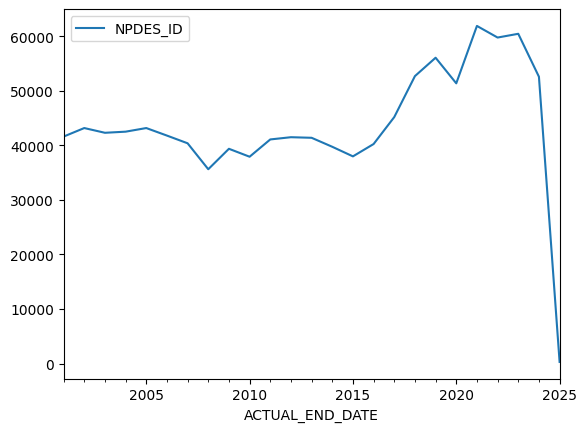

In [ ]:
# Analyze inspections on their own, then in relation to violations
wi_peryear = water_inspections.set_index("ACTUAL_END_DATE").resample('YE').count()[["NPDES_ID"]] # Count of inspections
wi_unique_peryear = water_inspections.set_index("ACTUAL_END_DATE").resample('YE').nunique()[["NPDES_ID"]] # Number of different facilities inspected
wi_peryear/wi_unique_peryear # Intensity of inspections
(water_peryear["NUME90Q"] / wi_peryear["NPDES_ID"]).plot() # Violations per inspection
wi_peryear.plot()

In [ ]:
wi_peryear/wi_unique_peryear

,NPDES_ID
ACTUAL_END_DATE,
2001-12-31,2.136606
2002-12-31,2.157264
2003-12-31,1.950387
2004-12-31,1.835629
2005-12-31,1.823743
2006-12-31,1.709400
2007-12-31,1.603304
2008-12-31,1.483878
2009-12-31,1.527629


In [ ]:
water_inspections

,NPDES_ID,REGISTRY_ID,ACTUAL_END_DATE,STATE_EPA_FLAG
0,NY0030864,110010637668,2003-11-18,E
1,PR0022772,110009815049,2003-11-17,E
2,PR0022721,110013721543,2003-11-17,E
3,WA0025666,110013724942,2002-12-02,E
4,WA0000825,110000491502,2002-08-26,E
...,...,...,...,...
1130050,HIU010790,HIU010790,2024-12-20,S
1130051,TX0126608,110034543652,2025-01-06,S
1130052,FLG110276,110006658599,2024-10-28,S
1130053,ALR10C4E2,110071512103,2024-12-11,S


## Enforcement

In [ ]:
sql = 'select * from "ICIS-AIR_FORMAL_ACTIONS" where "SETTLEMENT_ENTERED_DATE" like \'__/__/20__\''
air_enforcements = get_echo_data( sql )

# 2001 or later
air_enforcements["SETTLEMENT_ENTERED_DATE"]  = pandas.to_datetime(air_enforcements["SETTLEMENT_ENTERED_DATE"], format='%m/%d/%Y', errors='coerce')
air_enforcements = air_enforcements[(air_enforcements["SETTLEMENT_ENTERED_DATE"] > '2001') ]
air_enforcements

,PGM_SYS_ID,ACTIVITY_ID,ENF_IDENTIFIER,ACTIVITY_TYPE_CODE,ACTIVITY_TYPE_DESC,STATE_EPA_FLAG,ENF_TYPE_CODE,ENF_TYPE_DESC,SETTLEMENT_ENTERED_DATE,PENALTY_AMOUNT
0,NE0000003105500410,600031828,07-2007-0086,AFR,Administrative - Formal,E,113A,CAA 113A Admin Compliance Order (Non-Penalty),2007-03-08,0.0
1,NY0000002630700276,8170,02-2001-0019,JDC,Judicial,E,BNK,Bankruptcy,2009-04-20,140625.0
2,NJ0000003401706011,8185,02-2001-0508,AFR,Administrative - Formal,E,113D1,CAA 113D1 Action For Penalty,2001-03-28,0.0
3,OH0000001576000301,32040,05-1999-0757,JDC,Judicial,E,CIV,Civil Judicial Action,2001-08-28,3800000.0
4,MN0000002716300003,32040,05-1999-0757,JDC,Judicial,E,CIV,Civil Judicial Action,2001-08-28,3800000.0
...,...,...,...,...,...,...,...,...,...,...
82583,PA000492857,3604123861,PA000A0000E00000000433714,AFR,Administrative - Formal,S,SCAAAO,Administrative Order,2024-09-25,11000.0
82584,LA0000002208100107,3602435463,LA000A1851422,AFR,Administrative - Formal,S,SCAAAO,Administrative Order,2016-09-21,0.0
82585,WAPSC0005303300004,3604212114,WAPSCAF000000000000000482,AFR,Administrative - Formal,L,SCAAAO,Administrative Order,2024-10-31,0.0
82586,TX0000004824500037,3600354586,TX000A196368712009098,AFR,Administrative - Formal,S,SCAAAO,Administrative Order,2009-10-04,9475.0


In [ ]:
# Water
sql = 'select * from "CLEAN_WATER_ENFORCEMENT_ACTIONS_MVIEW" where "SETTLEMENT_ENTERED_DATE" like \'__/__/20__\''
water_enforcements = get_echo_data( sql )

# 2001 or later
water_enforcements["SETTLEMENT_ENTERED_DATE"]  = pandas.to_datetime(water_enforcements["SETTLEMENT_ENTERED_DATE"], format='%m/%d/%Y', errors='coerce')
water_enforcements = water_enforcements[(water_enforcements["SETTLEMENT_ENTERED_DATE"] > '2001') ]
water_enforcements

/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


,NPDES_ID,ENF_IDENTIFIER,ACTIVITY_ID,ACTIVITY_TYPE_CODE,ENF_TYPE_CODE,ENF_TYPE_DESC,AGENCY,SETTLEMENT_ENTERED_DATE,FED_PENALTY_ASSESSED_AMT,STATE_LOCAL_PENALTY_AMT,...,FAC_LAT,FAC_LONG,FAC_DERIVED_WBD,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN,FAC_DERIVED_HUC,FAC_SIC_CODES,FAC_NAICS_CODES,DFR_URL
0,AKG285024,10-2006-0247,170492,JDC,CIV,Civil Judicial Action,EPA,2006-08-30,813000.00,NaN,...,60.696111,-151.669444,1.902080e+11,NaN,0.000,0.00,19020601.0,1311,NaN,http://echo.epa.gov/detailed-facility-report?f...
1,PRU000517,02-2010-3109,1800104358,AFR,309A,CWA 309A AO For Compliance,EPA,2010-05-27,NaN,NaN,...,18.005306,-66.010472,2.101000e+11,0.0,99.366,858.23,21010004.0,NaN,NaN,http://echo.epa.gov/detailed-facility-report?f...
2,ILU000947,05-2020-0319,3603962744,JDC,CIV,Civil Judicial Action,EPA,2024-07-12,338100.00,144900.0,...,38.054000,-88.301110,5.120115e+10,15.0,0.704,15.04,5120115.0,NaN,NaN,http://echo.epa.gov/detailed-facility-report?f...
3,ILU000947,05-2021-0326,3602835164,JDC,CIV,Civil Judicial Action,EPA,2023-01-24,281898.15,120000.0,...,38.054000,-88.301110,5.120115e+10,15.0,0.704,15.04,5120115.0,NaN,NaN,http://echo.epa.gov/detailed-facility-report?f...
4,ILR10B425,IL-R10B425,2200028954,AFR,STAOCO,State Administrative Order of Consent,State,2010-06-30,NaN,12000.0,...,40.102875,-89.152611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://echo.epa.gov/detailed-facility-report?f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76509,LA0064335,LA-N00003941,1600188234,AFR,SCWAAO,State CWA Non Penalty AO,State,2001-10-30,NaN,NaN,...,30.149365,-90.872875,8.070204e+10,6.0,33.870,91.46,8070204.0,4953,562212,http://echo.epa.gov/detailed-facility-report?f...
76510,LA0064335,LA-SAWE200055,3602329654,AFR,STAOCO,State Administrative Order of Consent,State,2021-03-17,NaN,83909.0,...,30.149365,-90.872875,8.070204e+10,6.0,33.870,91.46,8070204.0,4953,562212,http://echo.epa.gov/detailed-facility-report?f...
76511,WAR000232,WA-788716,3602941202,AFR,SCWAAO,State CWA Non Penalty AO,State,2020-11-30,NaN,NaN,...,47.496415,-122.207215,1.711001e+11,9.0,53.873,4012.59,17110012.0,1794 3721,336411 56121 49311 541330 488119,http://echo.epa.gov/detailed-facility-report?f...
76512,MI0026778,MI-N00000823,2000027470,AFR,SCWAAO,State CWA Non Penalty AO,State,2003-09-08,NaN,NaN,...,42.277400,-83.110300,4.090004e+10,NaN,72.897,3970.56,4090004.0,3312,331110 331221,http://echo.epa.gov/detailed-facility-report?f...


In [ ]:
# Waste
sql = 'select * from "RCRA_ENFORCEMENTS_MVIEW" where "ENFORCEMENT_ACTION_DATE" like \'__/__/20__\''
waste_enforcements = get_echo_data( sql )

# 2001 or later
waste_enforcements["ENFORCEMENT_ACTION_DATE"]  = pandas.to_datetime(waste_enforcements["ENFORCEMENT_ACTION_DATE"], format='%m/%d/%Y', errors='coerce')
waste_enforcements = waste_enforcements[(waste_enforcements["ENFORCEMENT_ACTION_DATE"] > '2001') ]
waste_enforcements

/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:33: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1')


,ID_NUMBER,ACTIVITY_LOCATION,ENFORCEMENT_IDENTIFIER,ENFORCEMENT_TYPE,ENFORCEMENT_DESC,ENFORCEMENT_AGENCY,ENFORCEMENT_ACTION_DATE,PMP_AMOUNT,FMP_AMOUNT,FSC_AMOUNT,...,FAC_EPA_REGION,FAC_LAT,FAC_LONG,FAC_NAICS_CODES,FAC_DERIVED_WBD,FAC_SIC_CODES,FAC_DERIVED_HUC,FAC_DERIVED_CD113,FAC_PERCENT_MINORITY,FAC_POP_DEN
0,VAD000620864,VA,001,VA119,INSPECTOR FACT FINDING LETTER - Warning letter,S,2005-11-08,NaN,NaN,NaN,...,3.0,36.71892,-82.00767,812331,6.010102e+10,NaN,6010102.0,9.0,5.847,384.91
1,FLR000173765,FL,123,FL123,DEP NON-COMPLIANCE LETTER,S,2011-03-04,NaN,NaN,NaN,...,4.0,26.61414,-81.75765,811198,3.090205e+10,NaN,3090205.0,19.0,47.970,1145.43
2,WVR000539627,WV,001,HQ120,WRITTEN INFORMAL,E,2024-09-13,NaN,NaN,NaN,...,3.0,38.37504,-81.69693,541715,5.050008e+10,NaN,5050008.0,2.0,21.316,1444.60
3,WVR000539627,WV,001,HQ110,VERBAL INFORMAL,S,2019-08-27,NaN,NaN,NaN,...,3.0,38.37504,-81.69693,541715,5.050008e+10,NaN,5050008.0,2.0,21.316,1444.60
4,NCR000005298,NC,011,HQ120,WRITTEN INFORMAL,S,2017-02-27,NaN,NaN,NaN,...,4.0,36.07024,-79.92178,562998,3.030003e+10,NaN,3030003.0,12.0,42.737,1449.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218982,AKR000205856,AK,001,HQ120,WRITTEN INFORMAL,E,2016-03-09,NaN,NaN,NaN,...,10.0,60.96778,-149.12810,23622,1.902030e+11,NaN,19020401.0,1.0,10.505,90.21
218983,MOD000669150,MO,001,HQ120,WRITTEN INFORMAL,E,2010-10-14,NaN,NaN,NaN,...,7.0,38.19500,-91.04340,56291,7.140102e+10,NaN,7140102.0,8.0,5.714,21.93
218984,NYD980781488,NY,001,HQ120,WRITTEN INFORMAL,S,2007-09-10,NaN,NaN,NaN,...,2.0,42.31660,-75.40390,NaN,2.050101e+10,NaN,2050101.0,19.0,4.793,218.89
218985,NYD980781488,NY,001,HQ120,WRITTEN INFORMAL,S,2010-04-28,NaN,NaN,NaN,...,2.0,42.31660,-75.40390,NaN,2.050101e+10,NaN,2050101.0,19.0,4.793,218.89


<Axes: xlabel='SETTLEMENT_ENTERED_DATE'>

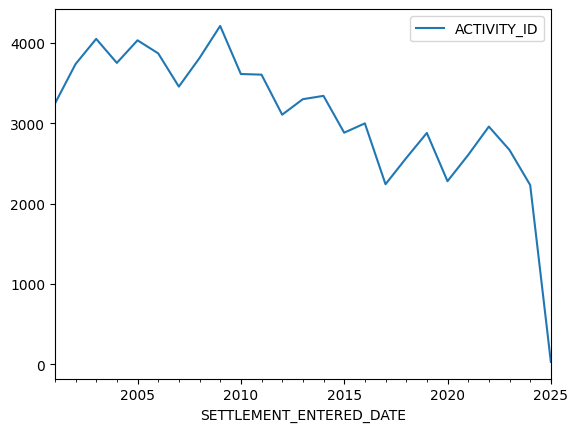

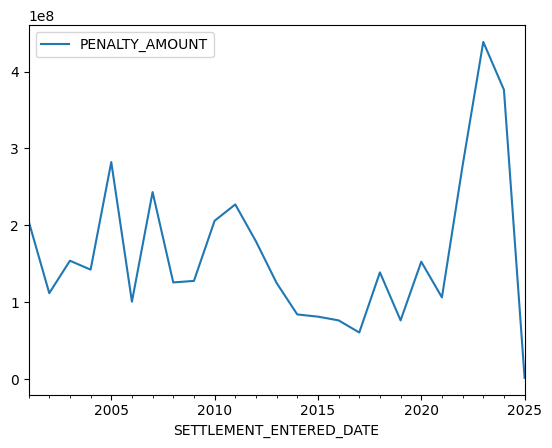

In [ ]:
# Analysis
air_enforcements.groupby(by="ENF_TYPE_DESC").agg({"PGM_SYS_ID":"nunique", "ACTIVITY_ID":"nunique"}).sort_values(by=["ACTIVITY_ID", "PGM_SYS_ID"], ascending=False).head(20)
air_enforcements.set_index("SETTLEMENT_ENTERED_DATE").resample('YE').nunique()[["ACTIVITY_ID"]].plot()  # Count of enforcements
air_enforcements.set_index("SETTLEMENT_ENTERED_DATE").resample('YE').sum()[["PENALTY_AMOUNT"]].plot()  # Sum of penalties

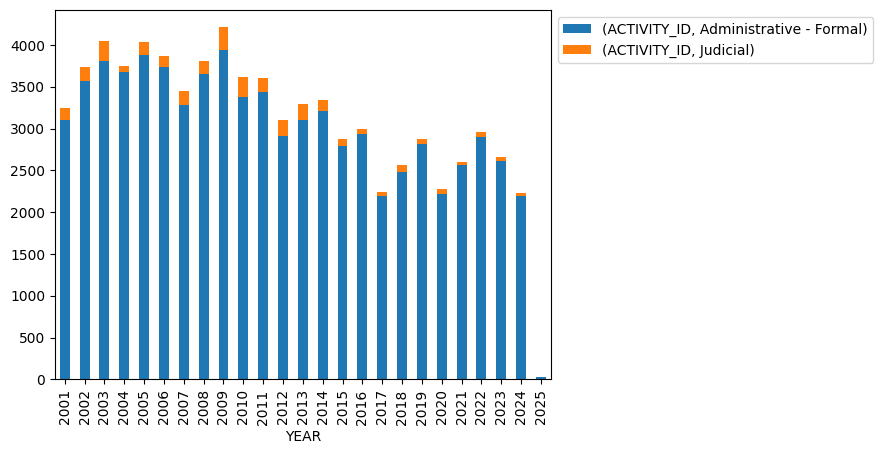

In [ ]:
# Types of enforcements
air_enforcements["YEAR"] = air_enforcements["SETTLEMENT_ENTERED_DATE"].dt.year
test = air_enforcements.groupby(by=["YEAR","ACTIVITY_TYPE_DESC"])[["ACTIVITY_ID"]].nunique()
test.unstack().plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1,1))

In [ ]:
air_enforcements.groupby(by="ENF_TYPE_DESC").agg({"PGM_SYS_ID":"nunique", "ACTIVITY_ID":"nunique"}).sort_values(by=["ACTIVITY_ID", "PGM_SYS_ID"], ascending=False).head(20)

,PGM_SYS_ID,ACTIVITY_ID
ENF_TYPE_DESC,,
Administrative Order,25614,65629
CAA 113D1 Action For Penalty,2990,4548
Civil Judicial Action,2713,2948
CAA 113A Admin Compliance Order (Non-Penalty),2237,2614
CAA 113D Withdrawn,412,466
CAA 113D1 Action For Penalty - 112(r) RMP Expedited Settlement Program,69,69
CAA 113D1 Action For Penalty - 112(r) Expedited Settlement Program,57,55
EPCRA 325 Action For Penalty,32,31
CAA 113 Notice Of Violation,50,27


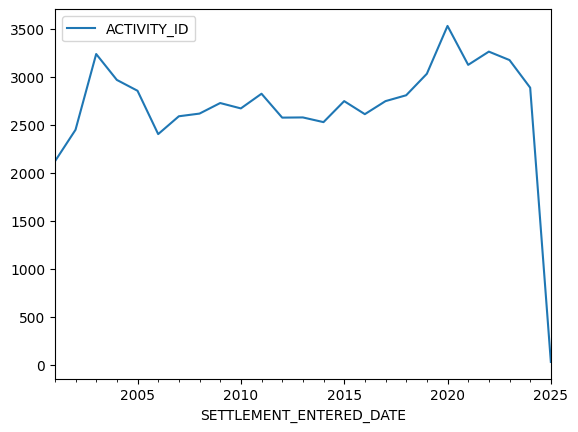

In [ ]:
# Analysis
water_enforcements.groupby(by="ENF_TYPE_DESC").agg({"NPDES_ID":"nunique", "ACTIVITY_ID":"nunique"}).sort_values(by=["ACTIVITY_ID", "NPDES_ID"], ascending=False).head(20)
water_enforcements.set_index("SETTLEMENT_ENTERED_DATE").resample('YE').nunique()[["ACTIVITY_ID"]].plot()  # Count of enforcements
water_enforcements[["FED_PENALTY_ASSESSED_AMT"]]=water_enforcements[["FED_PENALTY_ASSESSED_AMT"]].fillna(0).astype(int)

In [ ]:
water_enforcements.groupby(by="ENF_TYPE_DESC").agg({"NPDES_ID":"nunique", "ACTIVITY_ID":"nunique"}).sort_values(by=["ACTIVITY_ID", "NPDES_ID"], ascending=False).head(40)

,NPDES_ID,ACTIVITY_ID
ENF_TYPE_DESC,,
State CWA Penalty AO,10969,23405
State Administrative Order of Consent,14707,17957
State CWA Non Penalty AO,9780,13505
CWA 309A AO For Compliance,5909,7591
Civil Judicial Action,2220,1703
CWA 309G2B AO For Class II Penalties,1277,1276
CWA 309G2A AO For Class I Penalties,750,753
CWA 309G2E AO For Class I Penalties - Storm Water Construction Expedited Settlement Program,668,655
Order of Suspension or Revocation,88,90


<Axes: xlabel='ENFORCEMENT_ACTION_DATE'>

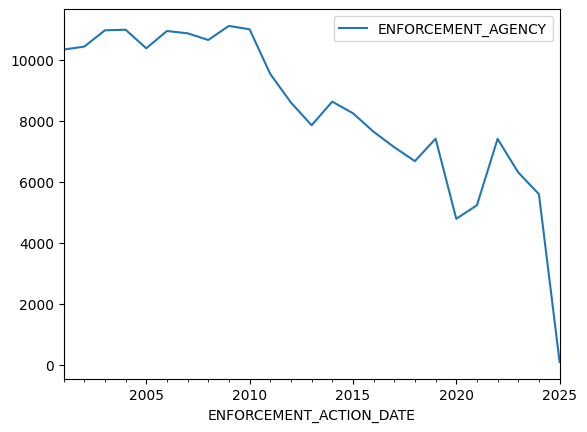

In [ ]:
# Analysis
waste_enforcements.groupby(by="ENFORCEMENT_DESC").agg({"ID_NUMBER":"nunique"}).sort_values(by=["ID_NUMBER"], ascending=False).head(20)
waste_enforcements.set_index("ENFORCEMENT_ACTION_DATE").resample('YE').count()[["ENFORCEMENT_AGENCY"]].plot()  # Count of enforcements
#waste_enforcements.set_index("ENFORCEMENT_ACTION_DATE").resample('YE').sum()[["FMP_AMOUNT"]].plot()  # Sum of penalties

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


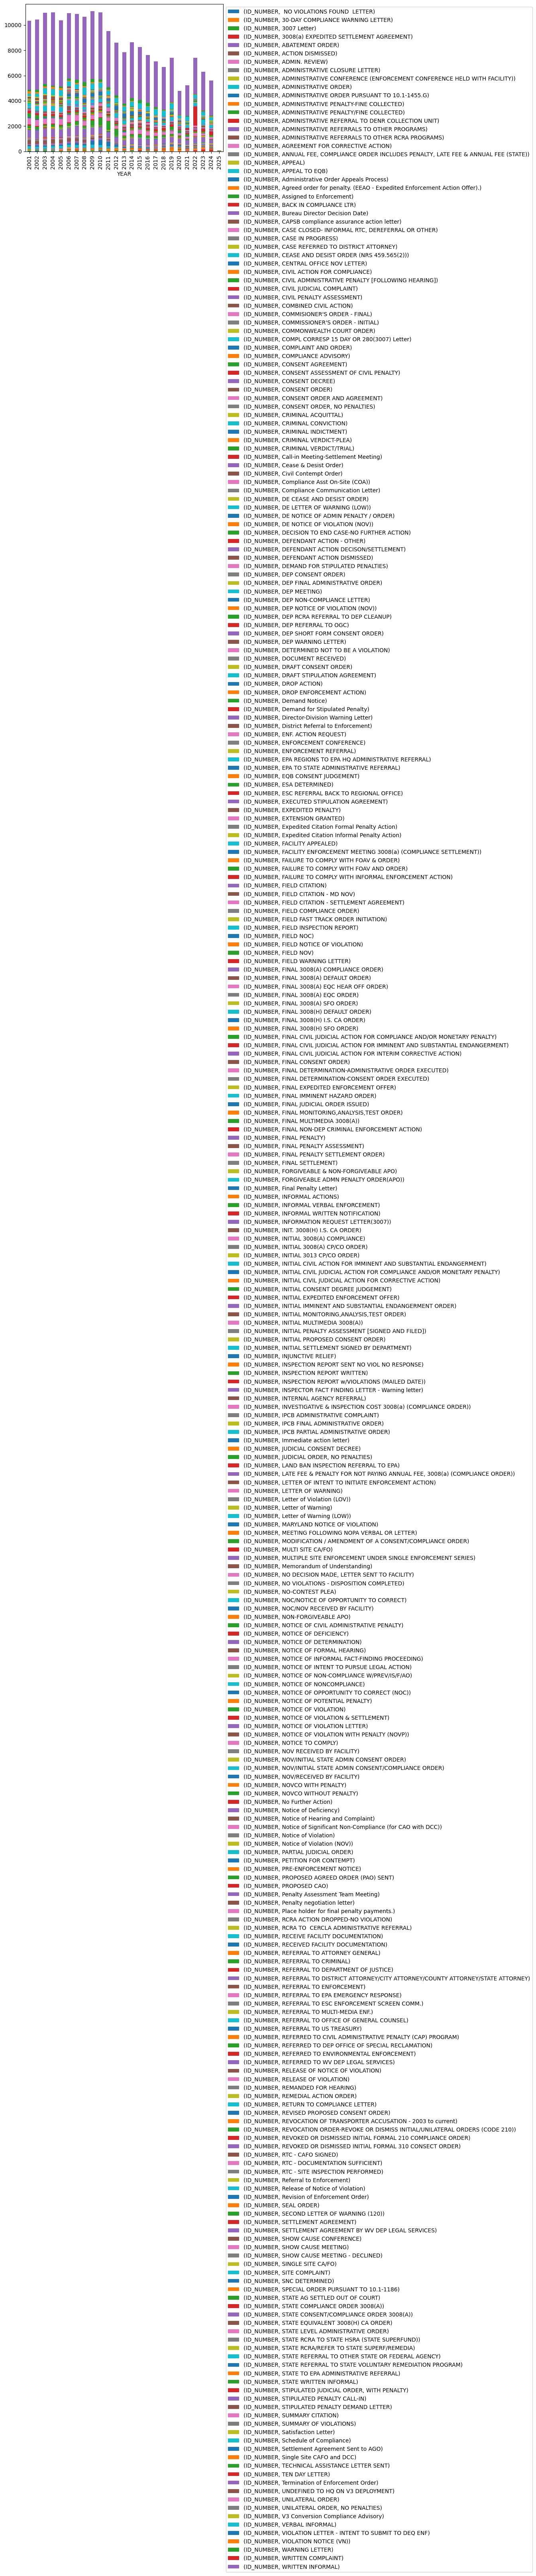

In [ ]:
# Types of enforcements
waste_enforcements["YEAR"] = waste_enforcements["ENFORCEMENT_ACTION_DATE"].dt.year
test = waste_enforcements.groupby(by=["YEAR","ENFORCEMENT_DESC"])[["ID_NUMBER"]].count()
test.unstack().plot(kind='bar', stacked=True).legend(bbox_to_anchor=(1,1))

<Axes: xlabel='YEAR'>

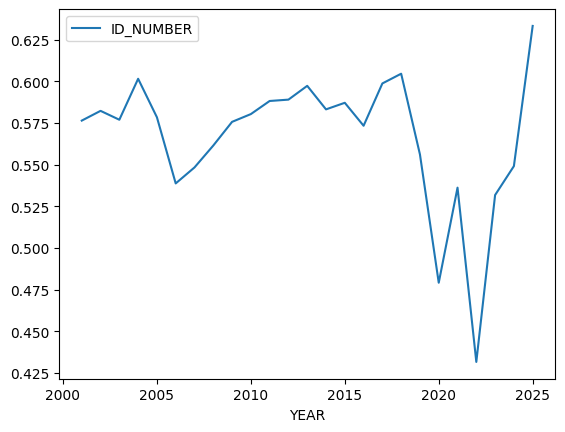

In [ ]:
inf = waste_enforcements[waste_enforcements["ENFORCEMENT_DESC"].str.contains("INFORMAL")].groupby(by=["YEAR"])[["ID_NUMBER"]].count()
all = waste_enforcements.groupby(by=["YEAR"])[["ID_NUMBER"]].count()
(inf/all).plot()